In [5]:
import pandas as pd 
import numpy as np
import os 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import datetime as dt
from wordcloud import WordCloud, STOPWORDS 

In [7]:
#Creating a dataframe 
df = pd.read_csv('cleaned-BA-reviews.csv')

# Let check if the index is in order 
df =  df.reset_index(drop=True)

In [8]:
df.head()

,Unnamed: 0,reviews,dates,countries,verified,corpus
0,0,"✅ Trip Verified | Filthy plane, cabin staff o...",2023-08-28,United Kingdom,True,filthy plane cabin staff ok appalling customer...
1,1,✅ Trip Verified | Chaos at Terminal 5 with B...,2023-08-27,United Kingdom,True,chaos terminal ba cancellation delay staff giv...
2,2,Not Verified | BA cancelled our flight and co...,2023-08-27,United Kingdom,False,verified ba cancelled flight could book u onto...
3,3,✅ Trip Verified | When on our way to Heathrow ...,2023-08-27,United Kingdom,True,way heathrow airport merely half hour schedule...
4,4,"✅ Trip Verified | Nice flight, good crew, very...",2023-08-26,United States,True,nice flight good crew good seat food would exp...


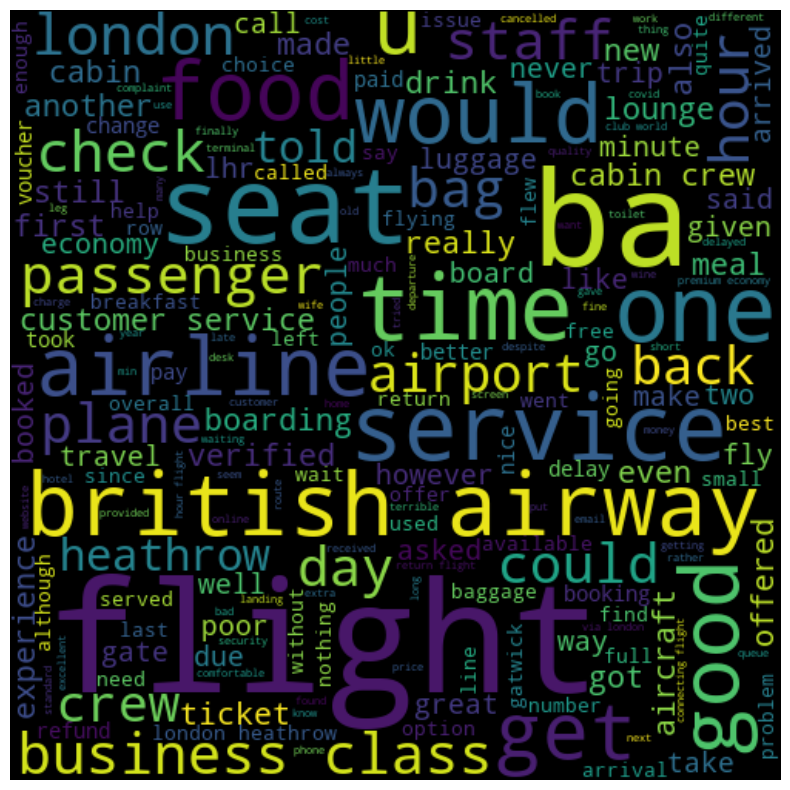

In [12]:
import nltk
from nltk.corpus import stopwords

# starting with one reviews 
reviews =  " ".join(df.corpus)
plt.figure(figsize = (20,10))

stopwords = set(stopwords.words('english'))

# create the word cloud image 
wordcloud =  WordCloud(height = 500, width = 500, max_font_size = 100, stopwords= stopwords).generate(reviews) 

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()


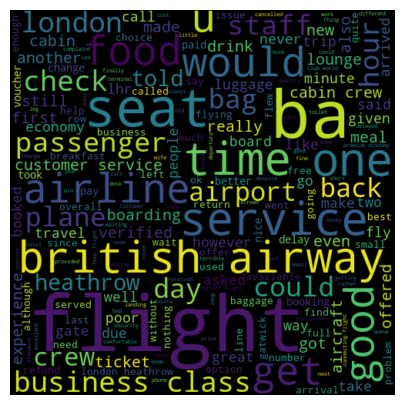

In [16]:
import nltk
from nltk.corpus import stopwords

reviews = " ".join(df.corpus)
plt.figure(figsize=(15,5))

stopwords = set(stopwords.words('english'))
stopwords.update(['flight', 'british', 'airways','airline', 'ba','would','get', 
                'one','heathrow',])

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is postive or negative along with the intensity of emotion.

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment 
def vadersentimentanalysis(reviews):
    vs = analyzer.polarity_scores(reviews)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)

# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,dates,countries,verified,corpus,Sentiment,Analysis
0,0,"✅ Trip Verified | Filthy plane, cabin staff o...",2023-08-28,United Kingdom,True,filthy plane cabin staff ok appalling customer...,-0.7003,Negative
1,1,✅ Trip Verified | Chaos at Terminal 5 with B...,2023-08-27,United Kingdom,True,chaos terminal ba cancellation delay staff giv...,-0.9313,Negative
2,2,Not Verified | BA cancelled our flight and co...,2023-08-27,United Kingdom,False,verified ba cancelled flight could book u onto...,-0.8268,Negative
3,3,✅ Trip Verified | When on our way to Heathrow ...,2023-08-27,United Kingdom,True,way heathrow airport merely half hour schedule...,-0.9169,Negative
4,4,"✅ Trip Verified | Nice flight, good crew, very...",2023-08-26,United States,True,nice flight good crew good seat food would exp...,0.9249,Positive


In [21]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Negative    491
Positive    413
Neutral      96
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x15d988c8150>,
 [Text(0.031097634977506766, 1.0995603380891865, 'Negative'),
  Text(-0.3563092223775127, -1.0406938733598523, 'Positive'),
  Text(1.2890670968118008, -0.4010062591995238, 'Neutral')],
 [Text(0.016962346351367324, 0.5997601844122834, '49.1%'),
  Text(-0.19435048493318874, -0.5676512036508284, '41.3%'),
  Text(0.811634838733356, -0.25248542245895944, '9.6%')])

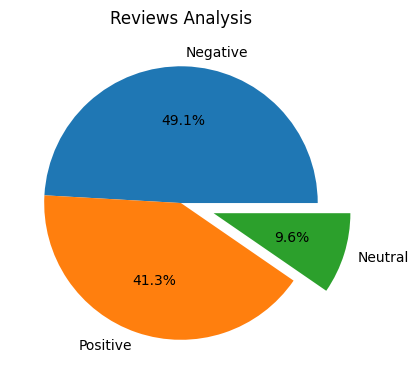

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode=(0, 0, 0.25), autopct= '%1.1f%%', shadow=False)

In [24]:
df.to_csv("Analysed_BA_reviews.csv")

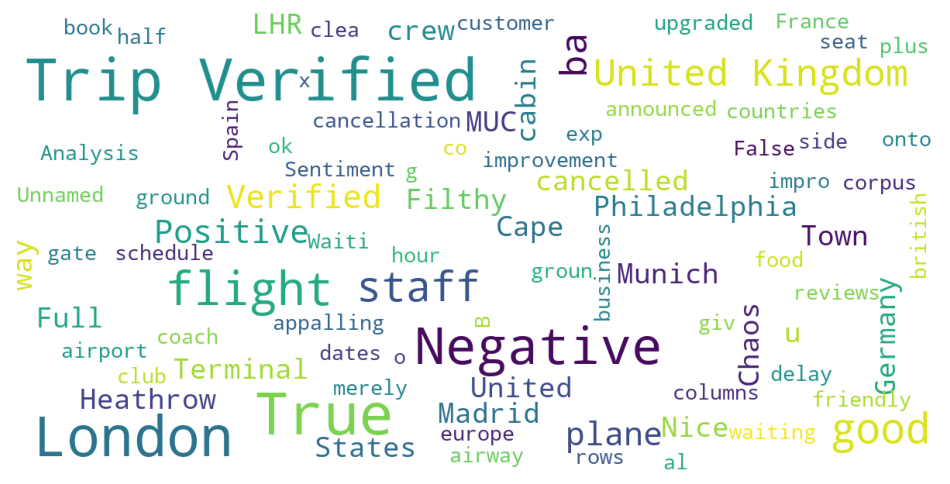

In [35]:
from wordcloud import WordCloud, STOPWORDS
stopwords =  set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=25,
        scale=3,
        random_state=1
    )

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1,figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df)

In [36]:
wordcloud.to_file("wordcloud.png")